FAKE NEWS DETECTION PREDICTION MODEL USING TFIDF VECTORIZATION METHOD 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/MY PROJECTS FOR GITHUB UPLOAD/Dataset/news.csv')

In [ ]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


EDA ANALYSIS

In [ ]:
data.shape

(6335, 4)

In [ ]:
data.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
data['label'].unique 

<bound method Series.unique of 0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object>

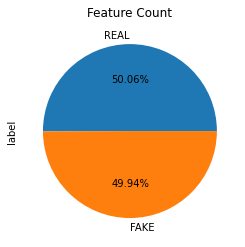

In [ ]:
data['label'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Feature Count")
plt.show()

In [ ]:
data.isnull().sum() #their is no null values 

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

IF-IDF VECTORIZATION METHOD IMPLEMENTATION 

In [ ]:
labels=data.label
x_train,x_test,y_train,y_test=train_test_split(data['text'], labels, test_size=0.2, random_state=7)

In [ ]:
# Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [ ]:
#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.82%


ML METHOD TO CHECK THE ACCURACY 

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder #importing LabelEncoder package

In [ ]:
def le(data): #defining labelEncoder
    for col in data.columns:
        if data[col].dtype == 'object':
               label_encoder = LabelEncoder()
               data[col] = label_encoder.fit_transform(data[col])

le(data)
#le(test)

In [ ]:
from sklearn.preprocessing import LabelEncoder
#
# Instantiate LabelEncoder
#
le = LabelEncoder()
#
# Encode single column status
#
data.label = le.fit_transform(data.label)
#
# Print df.head for checking the transformation
#
#data.head

In [ ]:
data.head()

,Unnamed: 0,title,text,label
0,8476,6155,1514,0
1,10294,5747,2185,0
2,3608,2946,5165,1
3,10142,653,5991,0
4,875,4788,2733,1


In [ ]:
data['label'].unique()

array([0, 1])

In [ ]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["label"],axis =1)
y = data["label"]

In [ ]:
#splitting of the data(80:20)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5068, 3), (5068,), (1267, 3), (1267,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
print(knn.score(X_train, y_train)) #ttain accuracy to print
print(knn.score(X_test, y_test))  #test accuracy to print 

0.994869771112865
0.9913180741910024


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)
print(logreg.score(X_train, y_train))  #train accuracy to print 
print(logreg.score(X_test, y_test))     #test accuracy to print 

0.8725335438042621
0.8595106550907656


In [ ]:

from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=50.0)
svm.fit(X_train, y_train)

print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))


1.0
0.500394632991318
